In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
db = pd.read_csv("/content/drive/MyDrive/Datasets/wine.csv")
db.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [128]:
data = db.copy()
db = db.drop(columns=['quality'])  
data = data.replace(['good', 'bad'], [0,1])


In [129]:

X = db
y = data.quality	
X.shape, y.shape,set(y)

((1599, 11), (1599,), {0, 1})

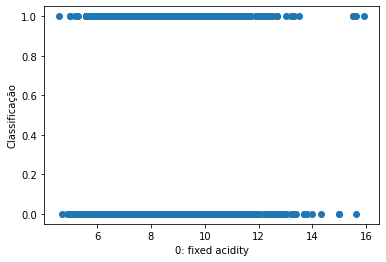

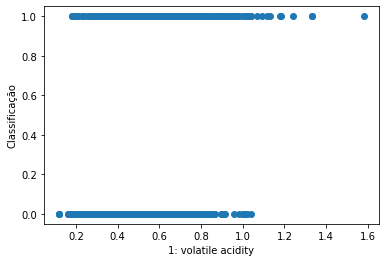

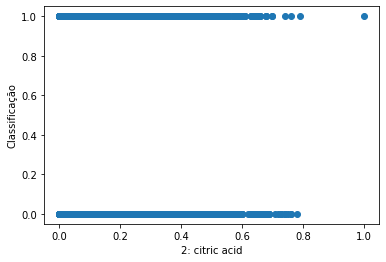

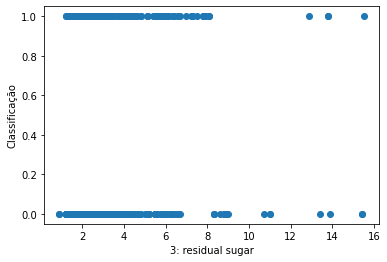

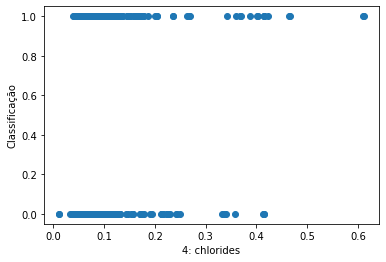

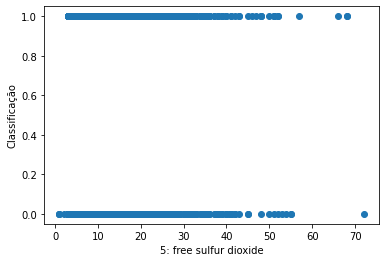

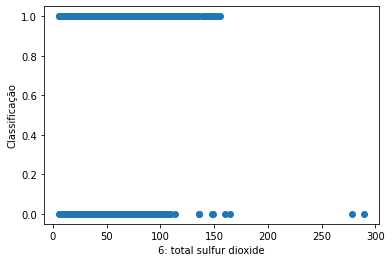

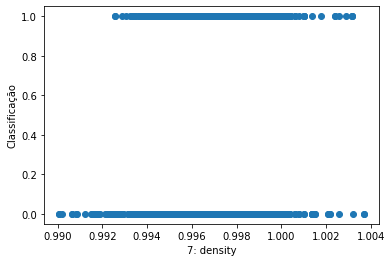

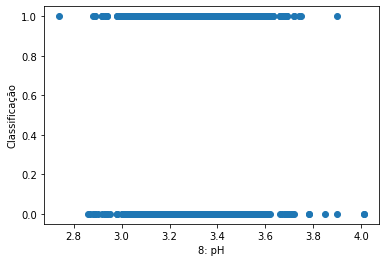

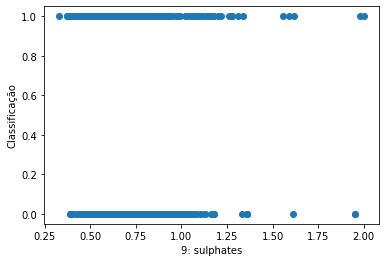

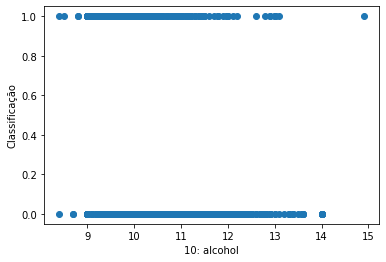

In [130]:
for i in range(11):
    plt.xlabel(f"{i}: {X.columns[i]}")
    plt.ylabel("Classificação")
    plt.scatter(X.iloc[:,i], y)
    plt.show()
    

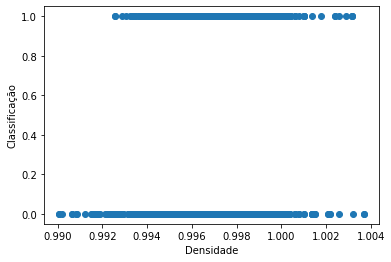

In [131]:
X7 = X.iloc[:,7:8]
plt.xlabel("Densidade")
plt.ylabel("Classificação")
plt.scatter(X7,y)
plt.show()


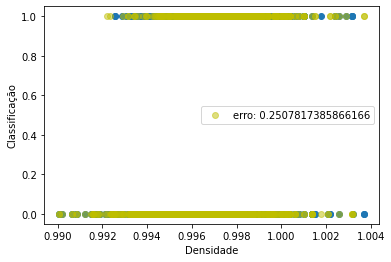

In [150]:
plt.xlabel("Densidade")
plt.ylabel("Classificação")
plt.scatter(X7, y)
modelo = LogisticRegression( max_iter=10000)
modelo.fit(X,y)
ypred = modelo.predict(X)
erro = mean_squared_error(y, ypred)
plt.plot(X7, ypred, 'yo', label=f"erro: {erro}", alpha=0.5)
plt.legend()
plt.show()


In [151]:
print(accuracy_score(y,ypred))

0.7492182614133833


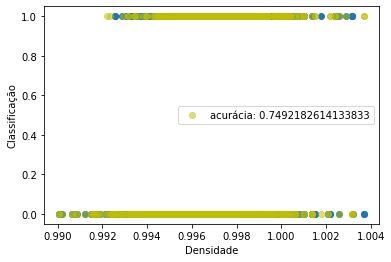

In [152]:
plt.xlabel("Densidade")
plt.ylabel("Classificação")
plt.scatter(X7, y)
modelo = LogisticRegression(max_iter=10000)
modelo.fit(X,y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
plt.plot(X8, ypred, 'yo', label=f"acurácia: {acuracia}", alpha=0.5)
plt.legend()
plt.show()

In [153]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

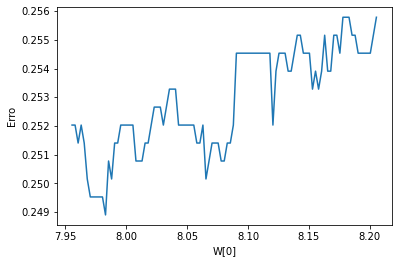

In [154]:
delta = [0.125, 0.818, 0.52]


def plot(i):
    erros = []
    intercept = modelo.intercept_
    ws = np.linspace(intercept-delta[i], intercept+delta[i], 101)
    for w in ws:
        modelo.intercept_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.intercept_[i] = intercept
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws,erros)
    plt.show()

for i in range(len(modelo.intercept_)):
    plot(i)

In [137]:
len(delta)

3

In [148]:
len(modelo.intercept_)

1

In [147]:
len(modelo.coef_)

1